In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindata=pd.read_csv('train_data.csv')

In [3]:
traindata.head()

ID Gender Has a car Has a property  Children count    Income  \
0  5037048      M         Y              Y               0  135000.0   
1  5044630      F         Y              N               1  135000.0   
2  5079079      F         N              Y               2  180000.0   
3  5112872      F         Y              Y               0  360000.0   
4  5105858      F         N              N               0  270000.0   

      Employment status                Education level        Marital status  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate               Higher education  Single / not married   
2  Commercial associate  Secondary / secondary special               Married   
3  Commercial associate               Higher education  Single / not married   
4               Working  Secondary / secondary special             Separated   

            Dwelling    Age  Employment length  Has a mobile phone  \
0       With parents -16271              -3111                   1   
1  House / apartment -10130              -1651                   1   
2  House / apartment -12821              -5657                   1   
3  House / apartment -20929              -2046                   1   
4  House / apartment -16207               -515                   1   

   Has a work phone  Has a phone  Has an email    Job title  \
0                 0            0             0   Core staff   
1                 0            0             0  Accountants   
2                 0            0             0     Laborers   
3                 0            0             1     Managers   
4                 0            1             0          NaN   

   Family member count  Account age  Is high risk  
0                  2.0        -17.0             0  
1                  2.0         -1.0             0  
2                  4.0        -38.0             0  
3                  1.0        -11.0             0  
4                  1.0        -41.0             0

In [4]:
traindata.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [5]:
traindata.shape


(29165, 20)

In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [7]:
traindata.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

# There are 9027 null values in the JobTitle columns lets fix it

In [8]:
traindata['Job title'].value_counts()

Job title
Laborers                 5004
Core staff               2866
Sales staff              2773
Managers                 2422
Drivers                  1722
High skill tech staff    1133
Accountants               998
Medicine staff            956
Cooking staff             521
Security staff            464
Cleaning staff            425
Private service staff     287
Low-skill Laborers        138
Waiters/barmen staff      127
Secretaries               122
HR staff                   72
Realty agents              60
IT staff                   48
Name: count, dtype: int64

In [9]:
traindata['Job title'].fillna('Laborers', inplace=True)

In [10]:
traindata.isnull().sum()

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

In [11]:
traindata[traindata.duplicated()]
#there are no duplicated values

Empty DataFrame
Columns: [ID, Gender, Has a car, Has a property, Children count, Income, Employment status, Education level, Marital status, Dwelling, Age, Employment length, Has a mobile phone, Has a work phone, Has a phone, Has an email, Job title, Family member count, Account age, Is high risk]
Index: []

Lets have a look at every columns 

In [12]:
columns=[ 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk']
for i in columns :
    print(f'{traindata[i].unique()}')

['M' 'F']
['Y' 'N']
['Y' 'N']
[ 0  1  2  3  4  5  7 14 19]
[ 135000.   180000.   360000.   270000.   202500.    90000.   306000.
  315000.   157500.   148500.   130500.    45000.   225000.   391500.
  112500.    99000.   207000.   189000.   292500.    81000.   126000.
  234000.   108000.   405000.   166500.   128542.5  540000.   450000.
  121500.   216000.    67500.   211500.   103500.   247500.   265500.
  153000.    72000.   337500.    85500.   238500.   120150.   171000.
  144000.   139500.   117000.   198000.   132372.   310500.   634500.
   76500.   240750.   261000.   193500.  1350000.   229500.   215550.
   94500.   720000.   206100.    78750.    58500.   427500.   382500.
  900000.   328500.    54000.   252000.    49500.   297000.   176175.
  175500.   560250.    73350.    65250.    40500.   495000.   360450.
  274500.   765000.   279000.   283500.    31500.   351000.    63000.
  115290.   155250.   184500.   162000.   185400.    97650.   585000.
  675000.   113400.   387000.  

In [13]:
traindata.describe()

ID  Children count        Income           Age  \
count  2.916500e+04    29165.000000  2.916500e+04  29165.000000   
mean   5.078232e+06        0.430790  1.868904e+05 -15979.477490   
std    4.182400e+04        0.741882  1.014096e+05   4202.997485   
min    5.008804e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.042047e+06        0.000000  1.215000e+05 -19444.000000   
50%    5.074666e+06        0.000000  1.575000e+05 -15565.000000   
75%    5.114629e+06        1.000000  2.250000e+05 -12475.000000   
max    5.150485e+06       19.000000  1.575000e+06  -7705.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       29165.000000             29165.0      29165.000000  29165.000000   
mean        59257.761255                 1.0          0.224310      0.294977   
std        137655.883458                 0.0          0.417134      0.456040   
min        -15713.000000                 1.0          0.000000      0.000000   
25%         -3153.000000                 1.0          0.000000      0.000000   
50%         -1557.000000                 1.0          0.000000      0.000000   
75%          -412.000000                 1.0          0.000000      1.000000   
max        365243.000000                 1.0          1.000000      1.000000   

       Has an email  Family member count   Account age  Is high risk  
count  29165.000000         29165.000000  29165.000000  29165.000000  
mean       0.090279             2.197531    -26.137734      0.017110  
std        0.286587             0.912189     16.486702      0.129682  
min        0.000000             1.000000    -60.000000      0.000000  
25%        0.000000             2.000000    -39.000000      0.000000  
50%        0.000000             2.000000    -24.000000      0.000000  
75%        0.000000             3.000000    -12.000000      0.000000  
max        1.000000            20.000000      0.000000      1.000000

In [14]:
traindata[traindata['Children count']>10]

ID Gender Has a car Has a property  Children count    Income  \
4445   5061210      M         Y              Y              14  225000.0   
15261  5105054      F         N              Y              19  112500.0   
25653  5061207      M         Y              Y              14  225000.0   

      Employment status                Education level        Marital status  \
4445            Working  Secondary / secondary special             Separated   
15261           Working  Secondary / secondary special  Single / not married   
25653           Working  Secondary / secondary special             Separated   

                Dwelling    Age  Employment length  Has a mobile phone  \
4445   House / apartment -17754              -1689                   1   
15261  House / apartment -11057              -1853                   1   
25653  House / apartment -17754              -1689                   1   

       Has a work phone  Has a phone  Has an email             Job title  \
4445                  0            0             0               Drivers   
15261                 1            1             0  Waiters/barmen staff   
25653                 0            0             0               Drivers   

       Family member count  Account age  Is high risk  
4445                  15.0         -7.0             0  
15261                 20.0         -5.0             0  
25653                 15.0        -58.0             0

In [15]:
import pandas as pd

def convert_to_absolute(df, column_name):

    df[column_name] = df[column_name].abs()
    return df


In [16]:
convert_to_absolute(traindata,'Age')
convert_to_absolute(traindata,'Employment length')
convert_to_absolute(traindata,'Account age')

ID Gender Has a car Has a property  Children count    Income  \
0      5037048      M         Y              Y               0  135000.0   
1      5044630      F         Y              N               1  135000.0   
2      5079079      F         N              Y               2  180000.0   
3      5112872      F         Y              Y               0  360000.0   
4      5105858      F         N              N               0  270000.0   
...        ...    ...       ...            ...             ...       ...   
29160  5067139      F         N              Y               0  112500.0   
29161  5029193      F         N              Y               1  135000.0   
29162  5047710      F         N              Y               0   76500.0   
29163  5009886      F         N              Y               0  157500.0   
29164  5062632      F         N              Y               0  585000.0   

          Employment status                Education level  \
0                   Working  Secondary / secondary special   
1      Commercial associate               Higher education   
2      Commercial associate  Secondary / secondary special   
3      Commercial associate               Higher education   
4                   Working  Secondary / secondary special   
...                     ...                            ...   
29160             Pensioner  Secondary / secondary special   
29161  Commercial associate  Secondary / secondary special   
29162               Working  Secondary / secondary special   
29163             Pensioner  Secondary / secondary special   
29164  Commercial associate  Secondary / secondary special   

             Marital status           Dwelling    Age  Employment length  \
0                   Married       With parents  16271               3111   
1      Single / not married  House / apartment  10130               1651   
2                   Married  House / apartment  12821               5657   
3      Single / not married  House / apartment  20929               2046   
4                 Separated  House / apartment  16207                515   
...                     ...                ...    ...                ...   
29160  Single / not married  House / apartment  23400             365243   
29161               Married  House / apartment  15532               8256   
29162               Married  House / apartment  17782               3291   
29163        Civil marriage  House / apartment  21635             365243   
29164               Married  House / apartment  18858               2010   

       Has a mobile phone  Has a work phone  Has a phone  Has an email  \
0                       1                 0            0             0   
1                       1                 0            0             0   
2                       1                 0            0             0   
3                       1                 0            0             1   
4                       1                 0            1             0   
...                   ...               ...          ...           ...   
29160                   1                 0            1             1   
29161                   1                 0            0             0   
29162                   1                 1            1             0   
29163                   1                 0            1             0   
29164                   1                 0            1             0   

         Job title  Family member count  Account age  Is high risk  
0       Core staff                  2.0         17.0             0  
1      Accountants                  2.0          1.0             0  
2         Laborers                  4.0         38.0             0  
3         Managers                  1.0         11.0             0  
4         Laborers                  1.0         41.0             0  
...            ...                  ...          ...           ...  
29160     Laborers                  1.0          5.0             0  


In [17]:
traindata['Marital status']=traindata['Marital status'].str.split('/').str[0]

In [18]:
traindata['Marital status'].unique()

array(['Married', 'Single ', 'Separated', 'Civil marriage', 'Widow'],
      dtype=object)

In [19]:
traindata['Dwelling']=traindata['Dwelling'].str.split('/').str[0]

In [20]:
traindata['Dwelling'].unique()

array(['With parents', 'House ', 'Municipal apartment',
       'Rented apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [21]:
traindata['Education level']=traindata['Education level'].str.split('/').str[0]

In [22]:
traindata['Education level'].unique()

array(['Secondary ', 'Higher education', 'Lower secondary',
       'Incomplete higher', 'Academic degree'], dtype=object)

In [23]:
traindata

ID Gender Has a car Has a property  Children count    Income  \
0      5037048      M         Y              Y               0  135000.0   
1      5044630      F         Y              N               1  135000.0   
2      5079079      F         N              Y               2  180000.0   
3      5112872      F         Y              Y               0  360000.0   
4      5105858      F         N              N               0  270000.0   
...        ...    ...       ...            ...             ...       ...   
29160  5067139      F         N              Y               0  112500.0   
29161  5029193      F         N              Y               1  135000.0   
29162  5047710      F         N              Y               0   76500.0   
29163  5009886      F         N              Y               0  157500.0   
29164  5062632      F         N              Y               0  585000.0   

          Employment status   Education level  Marital status      Dwelling  \
0                   Working        Secondary          Married  With parents   
1      Commercial associate  Higher education         Single         House    
2      Commercial associate        Secondary          Married        House    
3      Commercial associate  Higher education         Single         House    
4                   Working        Secondary        Separated        House    
...                     ...               ...             ...           ...   
29160             Pensioner        Secondary          Single         House    
29161  Commercial associate        Secondary          Married        House    
29162               Working        Secondary          Married        House    
29163             Pensioner        Secondary   Civil marriage        House    
29164  Commercial associate        Secondary          Married        House    

         Age  Employment length  Has a mobile phone  Has a work phone  \
0      16271               3111                   1                 0   
1      10130               1651                   1                 0   
2      12821               5657                   1                 0   
3      20929               2046                   1                 0   
4      16207                515                   1                 0   
...      ...                ...                 ...               ...   
29160  23400             365243                   1                 0   
29161  15532               8256                   1                 0   
29162  17782               3291                   1                 1   
29163  21635             365243                   1                 0   
29164  18858               2010                   1                 0   

       Has a phone  Has an email    Job title  Family member count  \
0                0             0   Core staff                  2.0   
1                0             0  Accountants                  2.0   
2                0             0     Laborers                  4.0   
3                0             1     Managers                  1.0   
4                1             0     Laborers                  1.0   
...            ...           ...          ...                  ...   
29160            1             1     Laborers                  1.0   
29161            0             0   Core staff                  3.0   
29162            1             0     Managers                  2.0   
29163            1             0     Laborers                  2.0   
29164            1             0     Laborers                  2.0   

       Account age  Is high risk  
0             17.0             0  
1              1.0             0  
2             38.0             0  
3             11.0             0  
4             41.0             0  
...            ...           ...  
29160          5.0             0  
29161         24.0             0  
29162         29.0             0  
29163         37.0             0  
29164         43.0             0  

[29165 rows

In [24]:
traindata.describe()

ID  Children count        Income           Age  \
count  2.916500e+04    29165.000000  2.916500e+04  29165.000000   
mean   5.078232e+06        0.430790  1.868904e+05  15979.477490   
std    4.182400e+04        0.741882  1.014096e+05   4202.997485   
min    5.008804e+06        0.000000  2.700000e+04   7705.000000   
25%    5.042047e+06        0.000000  1.215000e+05  12475.000000   
50%    5.074666e+06        0.000000  1.575000e+05  15565.000000   
75%    5.114629e+06        1.000000  2.250000e+05  19444.000000   
max    5.150485e+06       19.000000  1.575000e+06  25152.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       29165.000000             29165.0      29165.000000  29165.000000   
mean        63671.273136                 1.0          0.224310      0.294977   
std        135670.832877                 0.0          0.417134      0.456040   
min            17.000000                 1.0          0.000000      0.000000   
25%          1172.000000                 1.0          0.000000      0.000000   
50%          2530.000000                 1.0          0.000000      0.000000   
75%          5728.000000                 1.0          0.000000      1.000000   
max        365243.000000                 1.0          1.000000      1.000000   

       Has an email  Family member count   Account age  Is high risk  
count  29165.000000         29165.000000  29165.000000  29165.000000  
mean       0.090279             2.197531     26.137734      0.017110  
std        0.286587             0.912189     16.486702      0.129682  
min        0.000000             1.000000      0.000000      0.000000  
25%        0.000000             2.000000     12.000000      0.000000  
50%        0.000000             2.000000     24.000000      0.000000  
75%        0.000000             3.000000     39.000000      0.000000  
max        1.000000            20.000000     60.000000      1.000000

In [25]:
def convert_days_into_years(df,column):
    df[column] = df[column] // 365
    return df
    

In [26]:
convert_days_into_years(traindata,'Age')


ID Gender Has a car Has a property  Children count    Income  \
0      5037048      M         Y              Y               0  135000.0   
1      5044630      F         Y              N               1  135000.0   
2      5079079      F         N              Y               2  180000.0   
3      5112872      F         Y              Y               0  360000.0   
4      5105858      F         N              N               0  270000.0   
...        ...    ...       ...            ...             ...       ...   
29160  5067139      F         N              Y               0  112500.0   
29161  5029193      F         N              Y               1  135000.0   
29162  5047710      F         N              Y               0   76500.0   
29163  5009886      F         N              Y               0  157500.0   
29164  5062632      F         N              Y               0  585000.0   

          Employment status   Education level  Marital status      Dwelling  \
0                   Working        Secondary          Married  With parents   
1      Commercial associate  Higher education         Single         House    
2      Commercial associate        Secondary          Married        House    
3      Commercial associate  Higher education         Single         House    
4                   Working        Secondary        Separated        House    
...                     ...               ...             ...           ...   
29160             Pensioner        Secondary          Single         House    
29161  Commercial associate        Secondary          Married        House    
29162               Working        Secondary          Married        House    
29163             Pensioner        Secondary   Civil marriage        House    
29164  Commercial associate        Secondary          Married        House    

       Age  Employment length  Has a mobile phone  Has a work phone  \
0       44               3111                   1                 0   
1       27               1651                   1                 0   
2       35               5657                   1                 0   
3       57               2046                   1                 0   
4       44                515                   1                 0   
...    ...                ...                 ...               ...   
29160   64             365243                   1                 0   
29161   42               8256                   1                 0   
29162   48               3291                   1                 1   
29163   59             365243                   1                 0   
29164   51               2010                   1                 0   

       Has a phone  Has an email    Job title  Family member count  \
0                0             0   Core staff                  2.0   
1                0             0  Accountants                  2.0   
2                0             0     Laborers                  4.0   
3                0             1     Managers                  1.0   
4                1             0     Laborers                  1.0   
...            ...           ...          ...                  ...   
29160            1             1     Laborers                  1.0   
29161            0             0   Core staff                  3.0   
29162            1             0     Managers                  2.0   
29163            1             0     Laborers                  2.0   
29164            1             0     Laborers                  2.0   

       Account age  Is high risk  
0             17.0             0  
1              1.0             0  
2             38.0             0  
3             11.0             0  
4             41.0             0  
...            ...           ...  
29160          5.0             0  
29161         24.0             0  
29162         29.0             0  
29163         37.0             0  
29164         43.0             0  

[29165 rows x 20 columns]

In [27]:
convert_days_into_years(traindata,'Employment length')

ID Gender Has a car Has a property  Children count    Income  \
0      5037048      M         Y              Y               0  135000.0   
1      5044630      F         Y              N               1  135000.0   
2      5079079      F         N              Y               2  180000.0   
3      5112872      F         Y              Y               0  360000.0   
4      5105858      F         N              N               0  270000.0   
...        ...    ...       ...            ...             ...       ...   
29160  5067139      F         N              Y               0  112500.0   
29161  5029193      F         N              Y               1  135000.0   
29162  5047710      F         N              Y               0   76500.0   
29163  5009886      F         N              Y               0  157500.0   
29164  5062632      F         N              Y               0  585000.0   

          Employment status   Education level  Marital status      Dwelling  \
0                   Working        Secondary          Married  With parents   
1      Commercial associate  Higher education         Single         House    
2      Commercial associate        Secondary          Married        House    
3      Commercial associate  Higher education         Single         House    
4                   Working        Secondary        Separated        House    
...                     ...               ...             ...           ...   
29160             Pensioner        Secondary          Single         House    
29161  Commercial associate        Secondary          Married        House    
29162               Working        Secondary          Married        House    
29163             Pensioner        Secondary   Civil marriage        House    
29164  Commercial associate        Secondary          Married        House    

       Age  Employment length  Has a mobile phone  Has a work phone  \
0       44                  8                   1                 0   
1       27                  4                   1                 0   
2       35                 15                   1                 0   
3       57                  5                   1                 0   
4       44                  1                   1                 0   
...    ...                ...                 ...               ...   
29160   64               1000                   1                 0   
29161   42                 22                   1                 0   
29162   48                  9                   1                 1   
29163   59               1000                   1                 0   
29164   51                  5                   1                 0   

       Has a phone  Has an email    Job title  Family member count  \
0                0             0   Core staff                  2.0   
1                0             0  Accountants                  2.0   
2                0             0     Laborers                  4.0   
3                0             1     Managers                  1.0   
4                1             0     Laborers                  1.0   
...            ...           ...          ...                  ...   
29160            1             1     Laborers                  1.0   
29161            0             0   Core staff                  3.0   
29162            1             0     Managers                  2.0   
29163            1             0     Laborers                  2.0   
29164            1             0     Laborers                  2.0   

       Account age  Is high risk  
0             17.0             0  
1              1.0             0  
2             38.0             0  
3             11.0             0  
4             41.0             0  
...            ...           ...  
29160          5.0             0  
29161         24.0             0  
29162         29.0             0  
29163         37.0             0  
29164         43.0             0  

[29165 rows x 20 columns]

In [28]:

#def convert_months_into_years(df,column):
    #df[column]=df[column]//12
    #return df

In [29]:
#convert_months_into_years(dataset,'Account age')

In [30]:
traindata

ID Gender Has a car Has a property  Children count    Income  \
0      5037048      M         Y              Y               0  135000.0   
1      5044630      F         Y              N               1  135000.0   
2      5079079      F         N              Y               2  180000.0   
3      5112872      F         Y              Y               0  360000.0   
4      5105858      F         N              N               0  270000.0   
...        ...    ...       ...            ...             ...       ...   
29160  5067139      F         N              Y               0  112500.0   
29161  5029193      F         N              Y               1  135000.0   
29162  5047710      F         N              Y               0   76500.0   
29163  5009886      F         N              Y               0  157500.0   
29164  5062632      F         N              Y               0  585000.0   

          Employment status   Education level  Marital status      Dwelling  \
0                   Working        Secondary          Married  With parents   
1      Commercial associate  Higher education         Single         House    
2      Commercial associate        Secondary          Married        House    
3      Commercial associate  Higher education         Single         House    
4                   Working        Secondary        Separated        House    
...                     ...               ...             ...           ...   
29160             Pensioner        Secondary          Single         House    
29161  Commercial associate        Secondary          Married        House    
29162               Working        Secondary          Married        House    
29163             Pensioner        Secondary   Civil marriage        House    
29164  Commercial associate        Secondary          Married        House    

       Age  Employment length  Has a mobile phone  Has a work phone  \
0       44                  8                   1                 0   
1       27                  4                   1                 0   
2       35                 15                   1                 0   
3       57                  5                   1                 0   
4       44                  1                   1                 0   
...    ...                ...                 ...               ...   
29160   64               1000                   1                 0   
29161   42                 22                   1                 0   
29162   48                  9                   1                 1   
29163   59               1000                   1                 0   
29164   51                  5                   1                 0   

       Has a phone  Has an email    Job title  Family member count  \
0                0             0   Core staff                  2.0   
1                0             0  Accountants                  2.0   
2                0             0     Laborers                  4.0   
3                0             1     Managers                  1.0   
4                1             0     Laborers                  1.0   
...            ...           ...          ...                  ...   
29160            1             1     Laborers                  1.0   
29161            0             0   Core staff                  3.0   
29162            1             0     Managers                  2.0   
29163            1             0     Laborers                  2.0   
29164            1             0     Laborers                  2.0   

       Account age  Is high risk  
0             17.0             0  
1              1.0             0  
2             38.0             0  
3             11.0             0  
4             41.0             0  
...            ...           ...  
29160          5.0             0  
29161         24.0             0  
29162         29.0             0  
29163         37.0             0  
29164         43.0             0  

[29165 rows x 20 columns]

In [31]:
traindata.describe()

ID  Children count        Income           Age  \
count  2.916500e+04    29165.000000  2.916500e+04  29165.000000   
mean   5.078232e+06        0.430790  1.868904e+05     43.271113   
std    4.182400e+04        0.741882  1.014096e+05     11.516459   
min    5.008804e+06        0.000000  2.700000e+04     21.000000   
25%    5.042047e+06        0.000000  1.215000e+05     34.000000   
50%    5.074666e+06        0.000000  1.575000e+05     42.000000   
75%    5.114629e+06        1.000000  2.250000e+05     53.000000   
max    5.150485e+06       19.000000  1.575000e+06     68.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       29165.000000             29165.0      29165.000000  29165.000000   
mean          173.915412                 1.0          0.224310      0.294977   
std           371.638402                 0.0          0.417134      0.456040   
min             0.000000                 1.0          0.000000      0.000000   
25%             3.000000                 1.0          0.000000      0.000000   
50%             6.000000                 1.0          0.000000      0.000000   
75%            15.000000                 1.0          0.000000      1.000000   
max          1000.000000                 1.0          1.000000      1.000000   

       Has an email  Family member count   Account age  Is high risk  
count  29165.000000         29165.000000  29165.000000  29165.000000  
mean       0.090279             2.197531     26.137734      0.017110  
std        0.286587             0.912189     16.486702      0.129682  
min        0.000000             1.000000      0.000000      0.000000  
25%        0.000000             2.000000     12.000000      0.000000  
50%        0.000000             2.000000     24.000000      0.000000  
75%        0.000000             3.000000     39.000000      0.000000  
max        1.000000            20.000000     60.000000      1.000000

<Axes: >

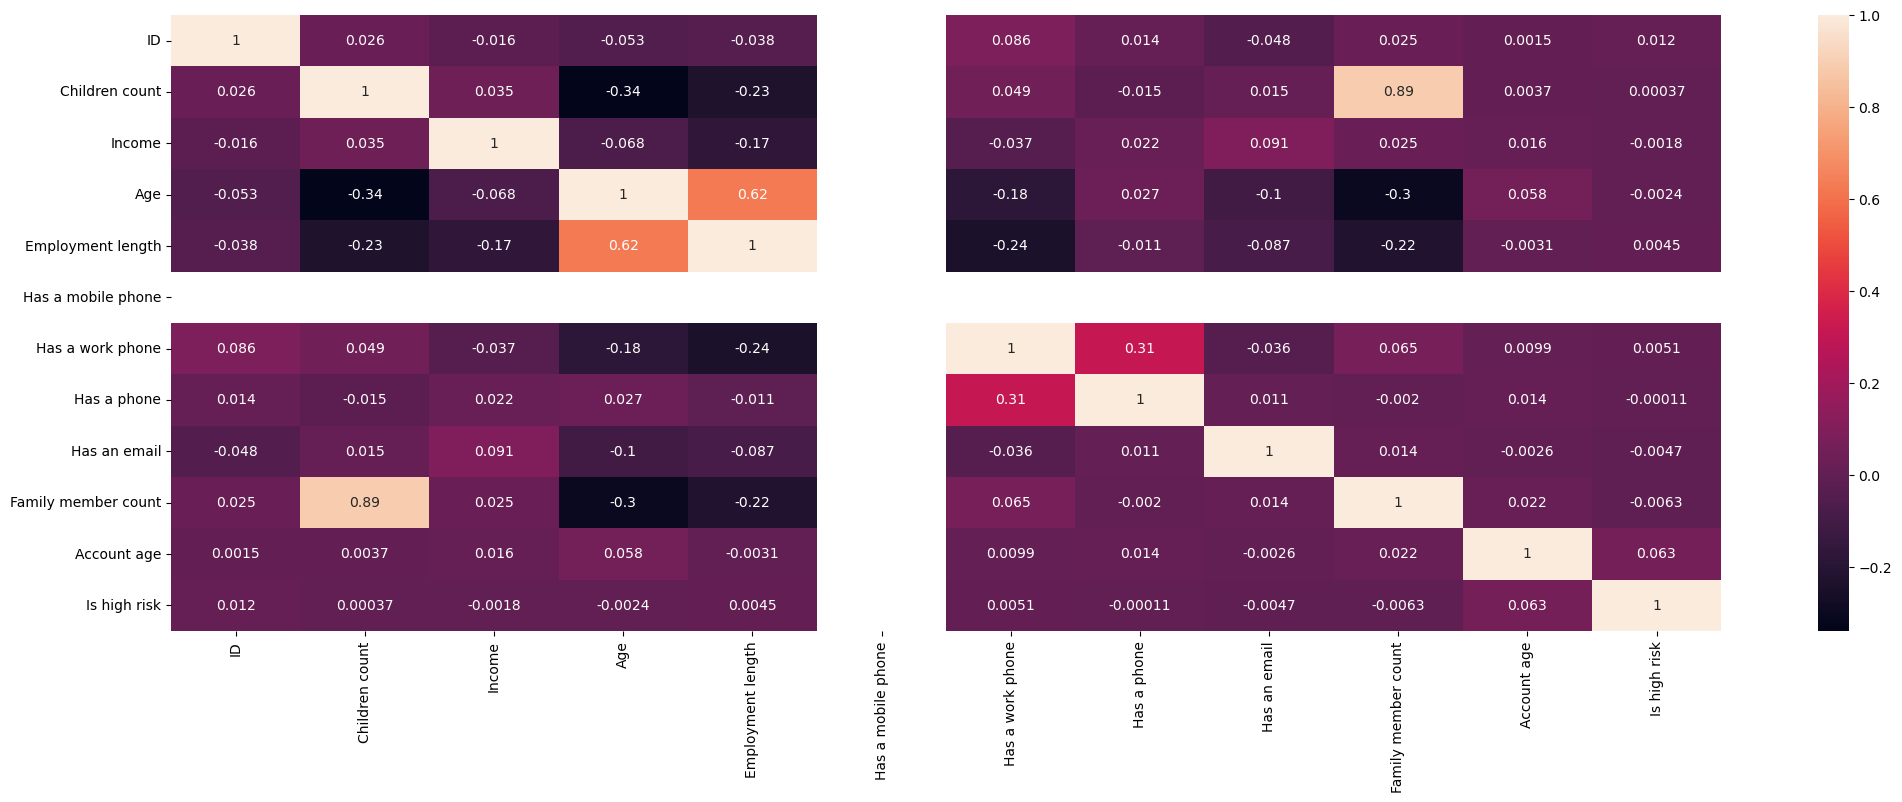

In [32]:
plt.figure(figsize=(25,8))
corr=traindata.select_dtypes(exclude='object').corr()
sns.heatmap(corr,annot=True)

In [33]:
Categorical=traindata.select_dtypes(include='object').columns.tolist()
Categorical

['Gender',
 'Has a car',
 'Has a property',
 'Employment status',
 'Education level',
 'Marital status',
 'Dwelling',
 'Job title']

In [34]:
print(traindata["Gender"].value_counts())
print(traindata["Has a car"].value_counts())
print(traindata["Has a property"].value_counts())
print(traindata["Employment status"].value_counts())
print(traindata["Education level"].value_counts())
print(traindata["Marital status"].value_counts())
print(traindata["Dwelling"].value_counts())
print(traindata["Job title"].value_counts())

Gender
F    19549
M     9616
Name: count, dtype: int64
Has a car
N    18128
Y    11037
Name: count, dtype: int64
Has a property
Y    19557
N     9608
Name: count, dtype: int64
Employment status
Working                 15056
Commercial associate     6801
Pensioner                4920
State servant            2381
Student                     7
Name: count, dtype: int64
Education level
Secondary            19803
Higher education      7910
Incomplete higher     1129
Lower secondary        298
Academic degree         25
Name: count, dtype: int64
Marital status
Married           20044
Single             3864
Civil marriage     2312
Separated          1712
Widow              1233
Name: count, dtype: int64
Dwelling
House                  26059
With parents            1406
Municipal apartment      912
Rented apartment         453
Office apartment         208
Co-op apartment          127
Name: count, dtype: int64
Job title
Laborers                 14031
Core staff                2866
Sales staff

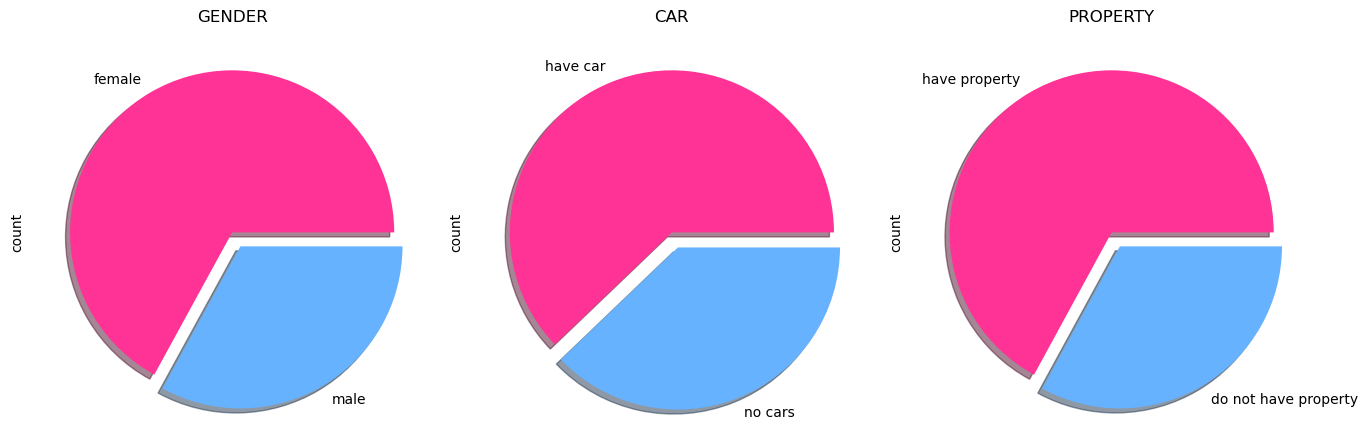

In [35]:
fig, axes = plt.subplots(1,3)
colors = ['#ff3395', '#66b2ff']

p1= traindata['Gender'].value_counts().plot.pie(labels=['female','male'],explode=[0,0.1], ax=axes[0], colors=colors, shadow=True)
p1.set_title("GENDER")

p1= traindata['Has a car'].value_counts().plot.pie(labels=['have car','no cars'],explode=[0,0.1], ax=axes[1],   colors=colors, shadow=True)
p1.set_title("CAR")

p1= traindata['Has a property'].value_counts().plot.pie(labels=['have property','do not have property'],explode=[0,0.1], ax=axes[2],   colors=colors, shadow=True)
p1.set_title("PROPERTY")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

<Axes: xlabel='Employment status'>

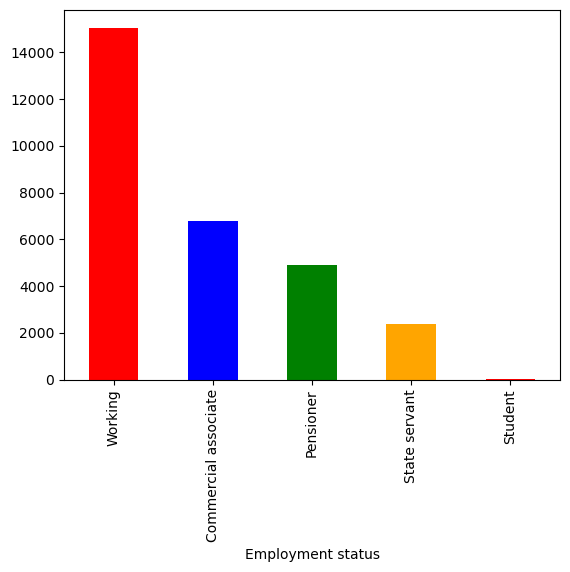

In [36]:
colors = ['red', 'blue','green','orange']
traindata['Employment status'].value_counts().plot(kind='bar',color=colors)

<Axes: xlabel='Education level'>

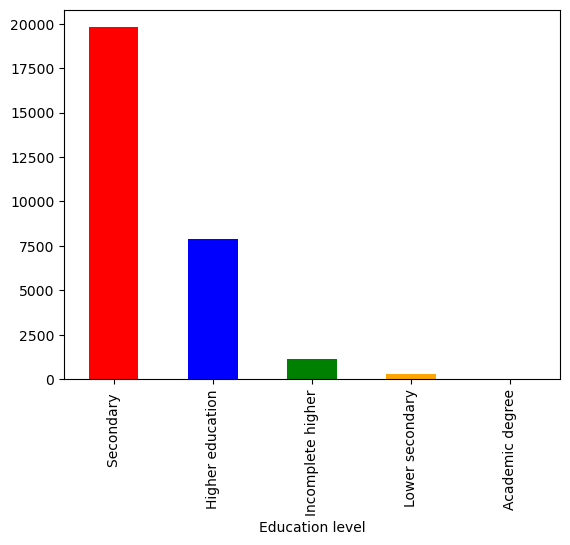

In [37]:
traindata['Education level'].value_counts().plot(kind='bar',color=colors)

<Axes: xlabel='Marital status'>

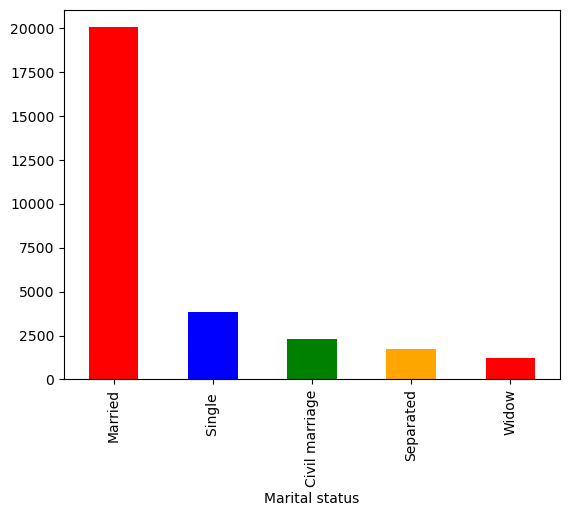

In [38]:
traindata['Marital status'].value_counts().plot(kind='bar',color=colors)

<Axes: xlabel='Dwelling'>

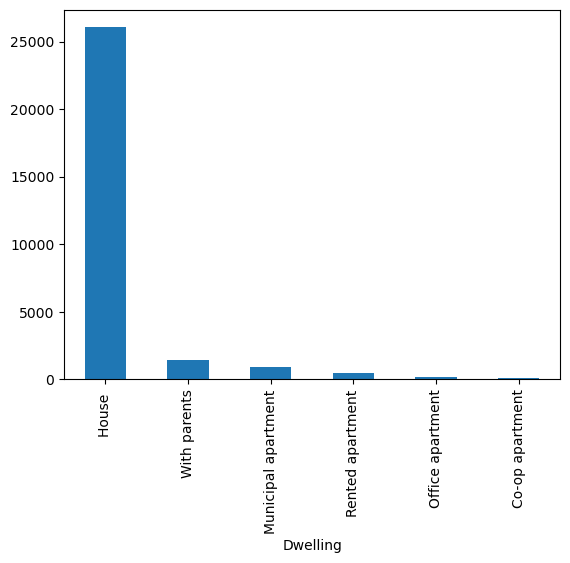

In [39]:
traindata['Dwelling'].value_counts().plot(kind='bar')

<Axes: xlabel='Job title'>

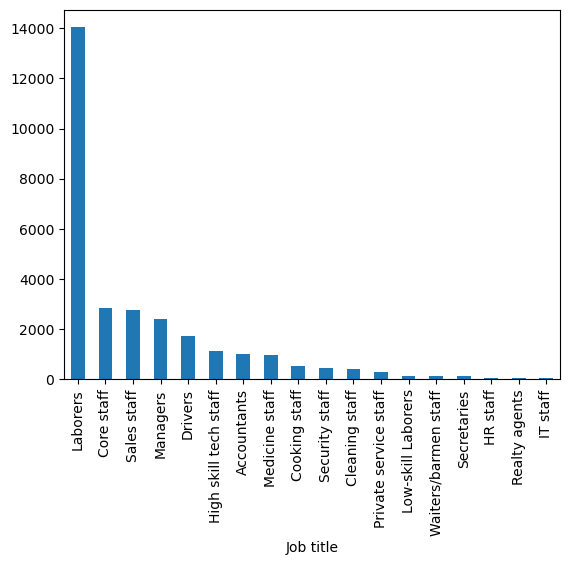

In [40]:
traindata['Job title'].value_counts().plot(kind='bar')

In [41]:
traindata['Is high risk'].value_counts()

Is high risk
0    28666
1      499
Name: count, dtype: int64

Is high risk
0    28666
1      499
Name: count, dtype: int64


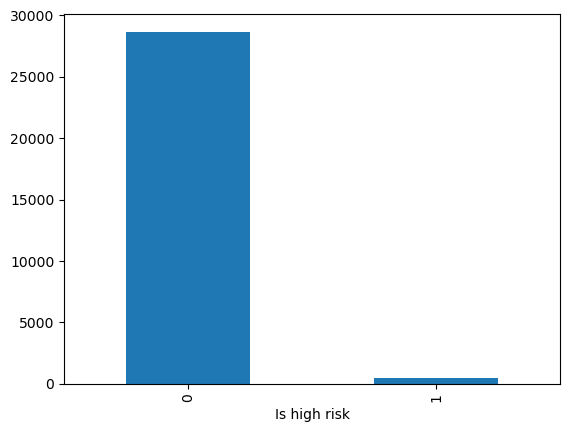

In [42]:
traindata['Is high risk'].value_counts().plot(kind='bar')
print(traindata['Is high risk'].value_counts())

# As we can see the data is so imbalanced

In [43]:
Numerical=traindata.select_dtypes(exclude='object').columns.tolist()
Numerical

['ID',
 'Children count',
 'Income',
 'Age',
 'Employment length',
 'Has a mobile phone',
 'Has a work phone',
 'Has a phone',
 'Has an email',
 'Family member count',
 'Account age',
 'Is high risk']

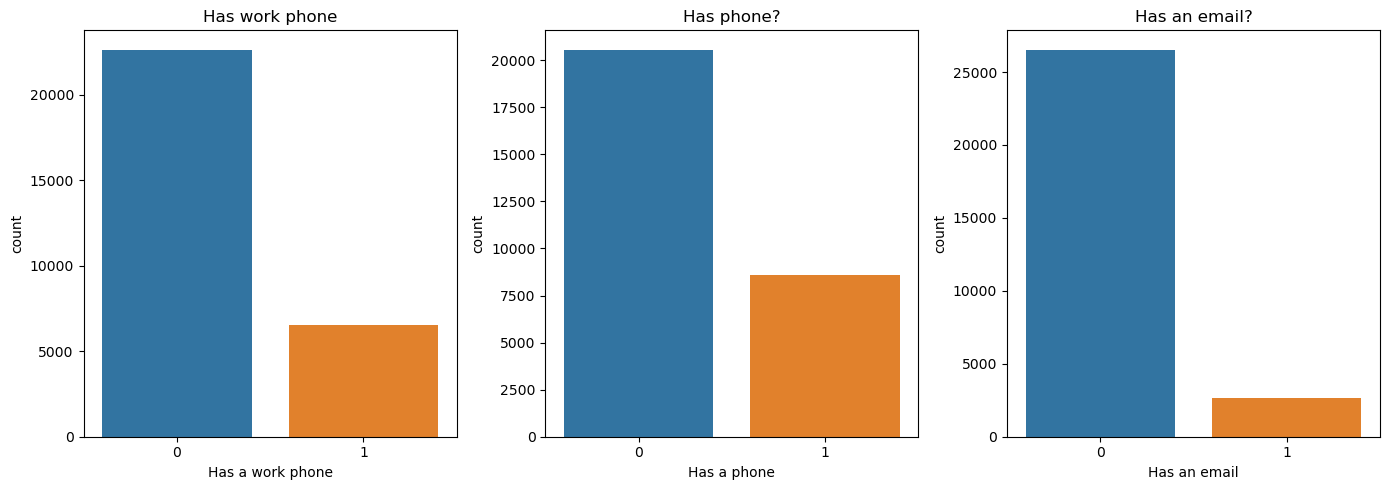

In [44]:
fig, axes = plt.subplots(1,3)
p1=sns.countplot(x=traindata['Has a work phone'],ax=axes[0],linewidth=1,)
p1.set_title('Has work phone')
p2=sns.countplot(x=traindata['Has a phone'],ax=axes[1],linewidth=1.2,)
p2.set_title('Has phone?')
p3=sns.countplot(x=traindata['Has an email'],ax=axes[2],linewidth=1.2,)
p3.set_title('Has an email?')
fig.set_size_inches(14,5)
plt.tight_layout()

plt.show()

<Axes: xlabel='Children count'>

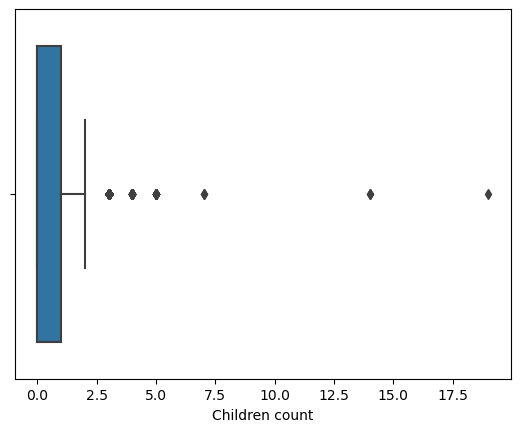

In [45]:
sns.boxplot( x=traindata["Children count"])

<Axes: xlabel='Children count', ylabel='count'>

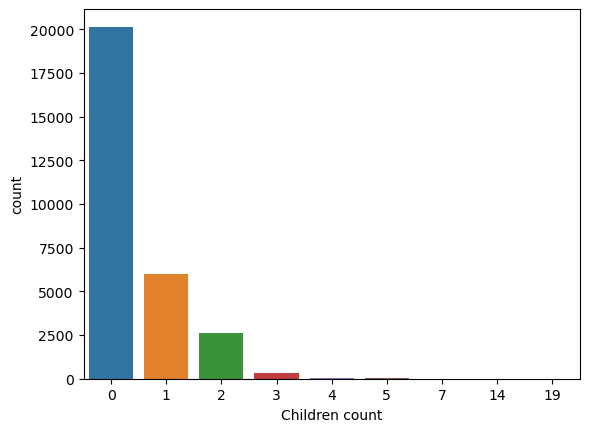

In [46]:
sns.countplot( x=traindata["Children count"])

<Axes: xlabel='Income'>

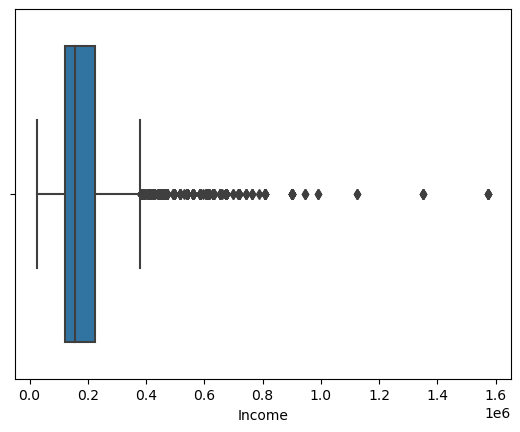

In [47]:
sns.boxplot( x=traindata["Income"])

/var/folders/qh/mmgp000n7wnfvgy5dk54hgt40000gn/T/ipykernel_27605/2859285725.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x=traindata["Income"])


<Axes: ylabel='Density'>

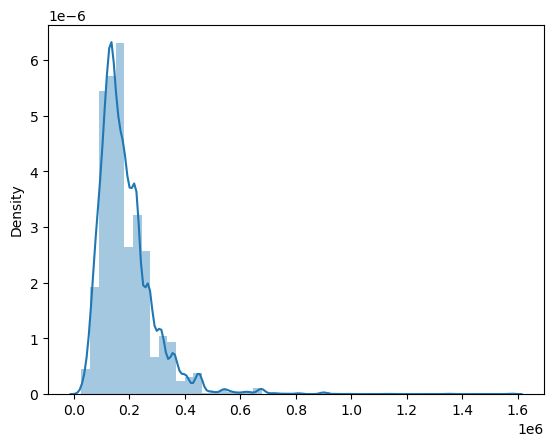

In [48]:
sns.distplot( x=traindata["Income"])

<Axes: xlabel='Age'>

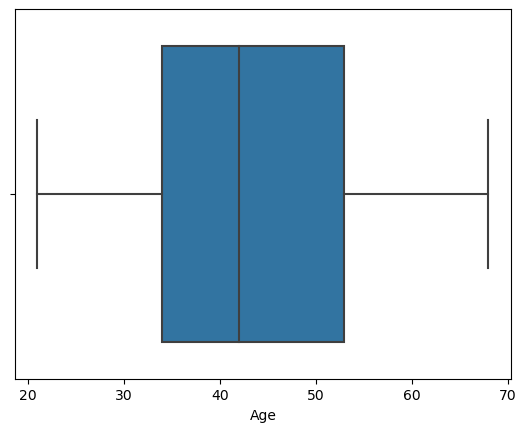

In [49]:
sns.boxplot( x=traindata["Age"])

/var/folders/qh/mmgp000n7wnfvgy5dk54hgt40000gn/T/ipykernel_27605/1578981029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x=traindata["Age"])


<Axes: ylabel='Density'>

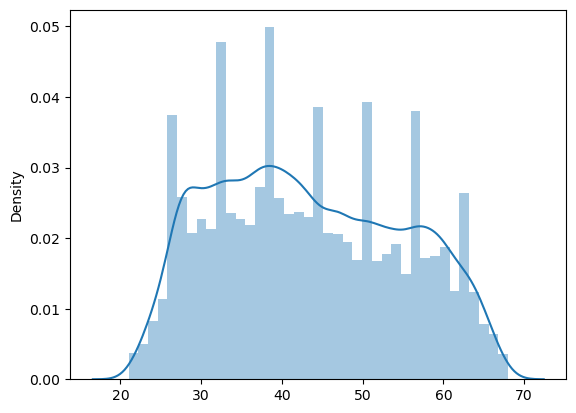

In [50]:
sns.distplot( x=traindata["Age"])

<Axes: xlabel='Employment length'>

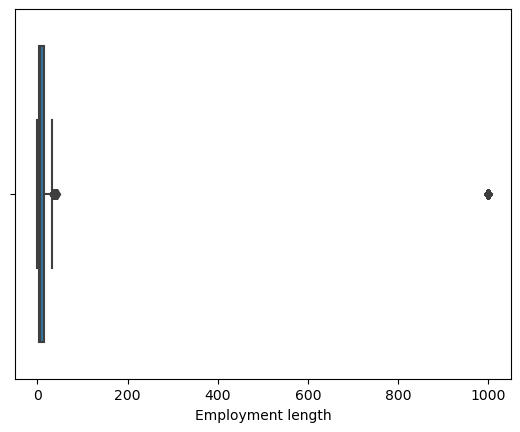

In [51]:
sns.boxplot( x=traindata["Employment length"])

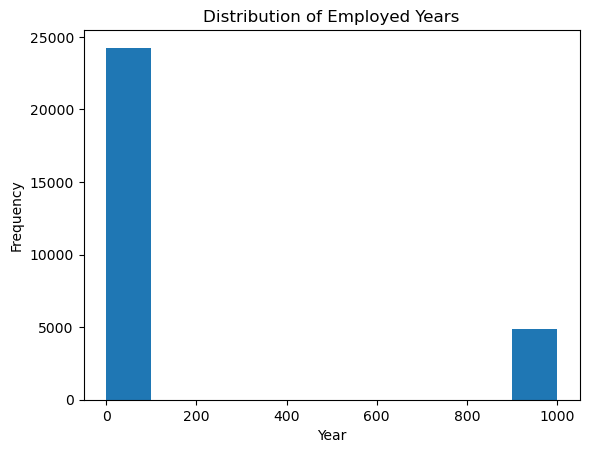

In [52]:
plt.hist(traindata['Employment length'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Employed Years')
plt.show()

<Axes: xlabel='Family member count', ylabel='count'>

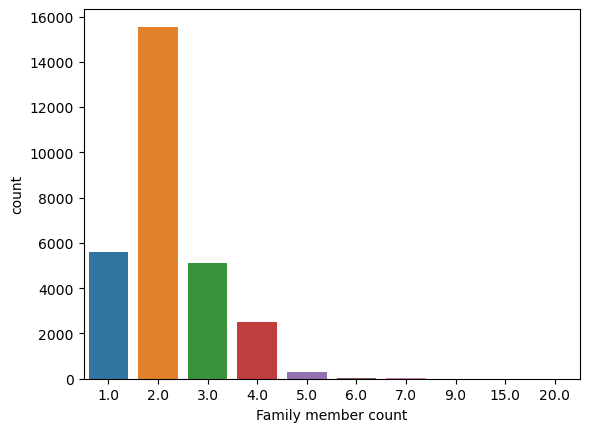

In [53]:
sns.countplot( x=traindata["Family member count"])

<Axes: xlabel='Family member count'>

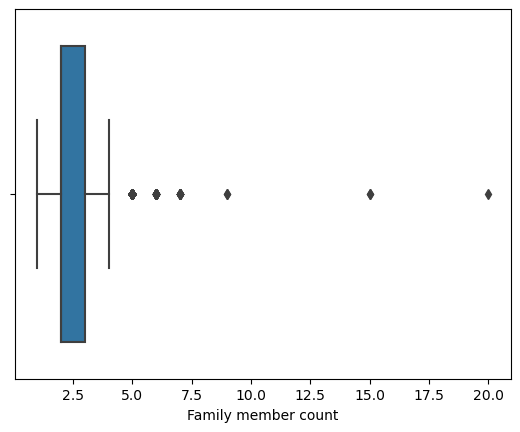

In [54]:
sns.boxplot( x=traindata["Family member count"])

<Axes: xlabel='Account age', ylabel='Count'>

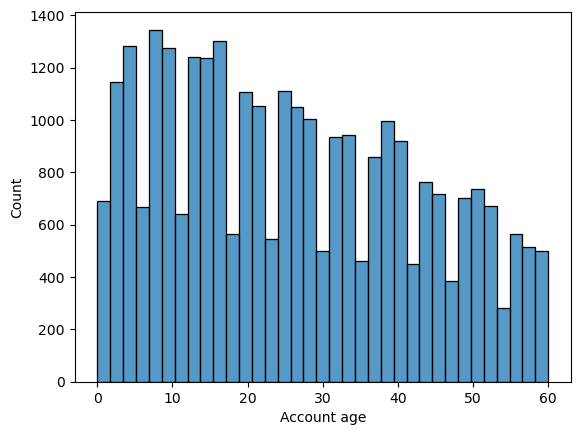

In [55]:
sns.histplot(x=traindata["Account age"])

<Axes: xlabel='Account age'>

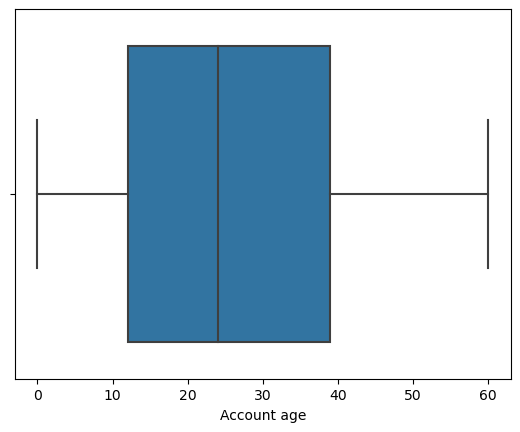

In [56]:
sns.boxplot(x=traindata["Account age"])

MULTIARIATE ANALYSIS

/var/folders/qh/mmgp000n7wnfvgy5dk54hgt40000gn/T/ipykernel_27605/3471598733.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindata[traindata['Is high risk']==0]['Income'])
/var/folders/qh/mmgp000n7wnfvgy5dk54hgt40000gn/T/ipykernel_27605/3471598733.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

<Axes: xlabel='Income', ylabel='Density'>

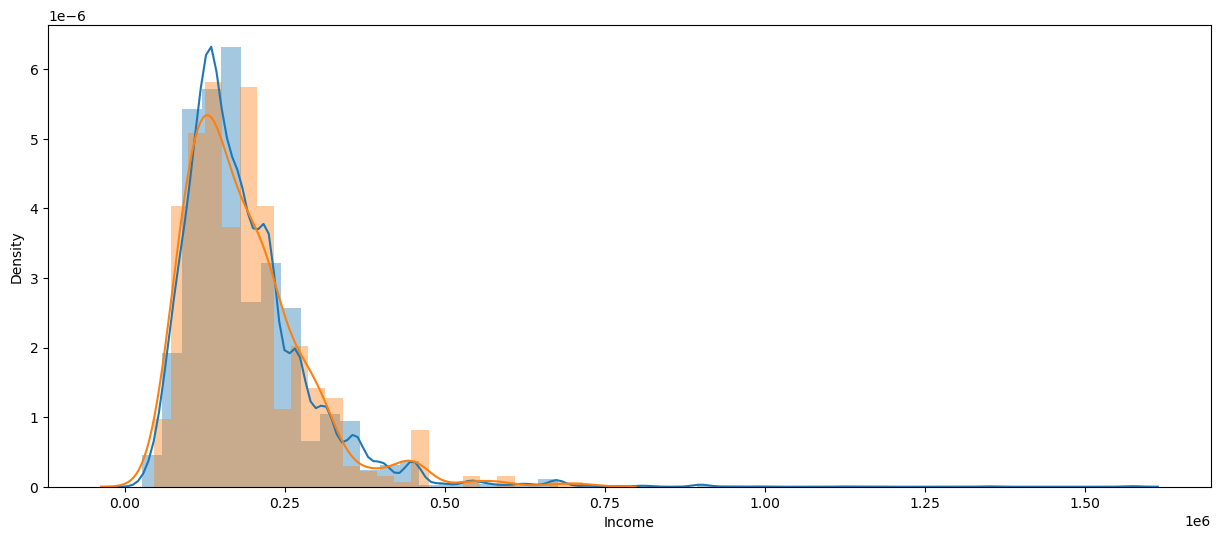

In [57]:
plt.figure(figsize=(15,6))
sns.distplot(traindata[traindata['Is high risk']==0]['Income'])
sns.distplot(traindata[traindata['Is high risk']==1]['Income'])

/var/folders/qh/mmgp000n7wnfvgy5dk54hgt40000gn/T/ipykernel_27605/567983278.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindata[traindata['Is high risk']==0]['Account age'])
/var/folders/qh/mmgp000n7wnfvgy5dk54hgt40000gn/T/ipykernel_27605/567983278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

<Axes: xlabel='Account age', ylabel='Density'>

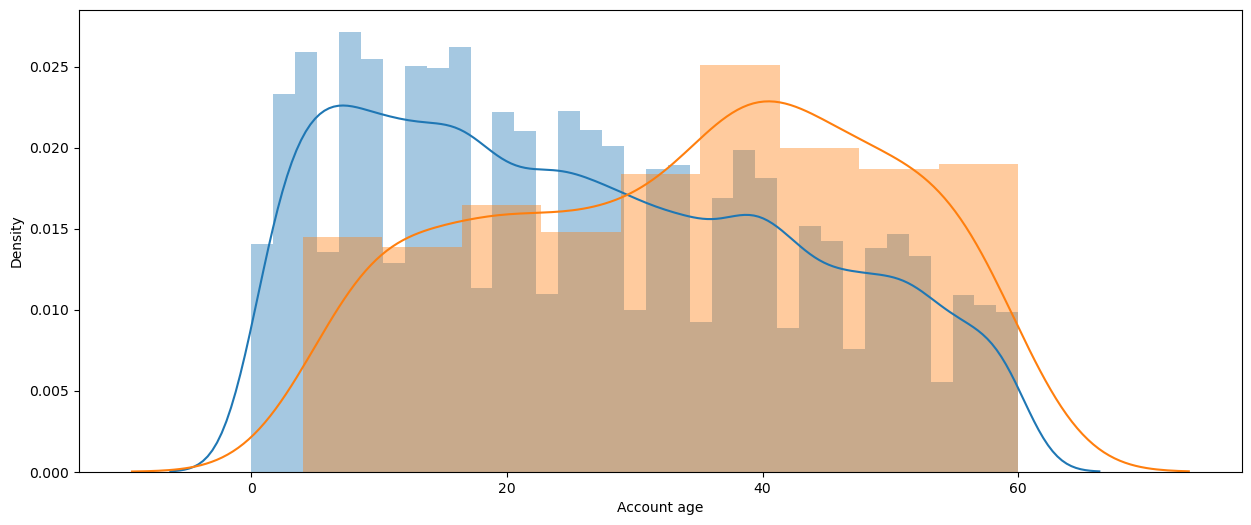

In [58]:

plt.figure(figsize=(15,6))
sns.distplot(traindata[traindata['Is high risk']==0]['Account age'])
sns.distplot(traindata[traindata['Is high risk']==1]['Account age'])


In [59]:

def remove_outliers(df, columns):
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df


In [60]:
cleanedtraindata = remove_outliers(traindata, ['Income', 'Employment length','Family member count','Children count'])

In [61]:
cleanedtraindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22662 entries, 0 to 29162
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   22662 non-null  int64  
 1   Gender               22662 non-null  object 
 2   Has a car            22662 non-null  object 
 3   Has a property       22662 non-null  object 
 4   Children count       22662 non-null  int64  
 5   Income               22662 non-null  float64
 6   Employment status    22662 non-null  object 
 7   Education level      22662 non-null  object 
 8   Marital status       22662 non-null  object 
 9   Dwelling             22662 non-null  object 
 10  Age                  22662 non-null  int64  
 11  Employment length    22662 non-null  int64  
 12  Has a mobile phone   22662 non-null  int64  
 13  Has a work phone     22662 non-null  int64  
 14  Has a phone          22662 non-null  int64  
 15  Has an email         22662 non-null  int6

<Axes: >

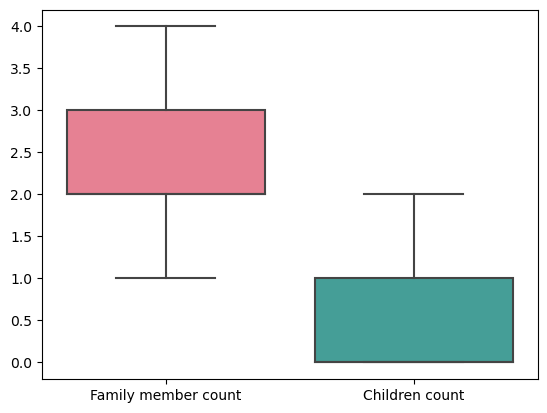

In [62]:
sns.boxplot( data=cleanedtraindata[["Family member count","Children count"]],palette="husl")

<Axes: >

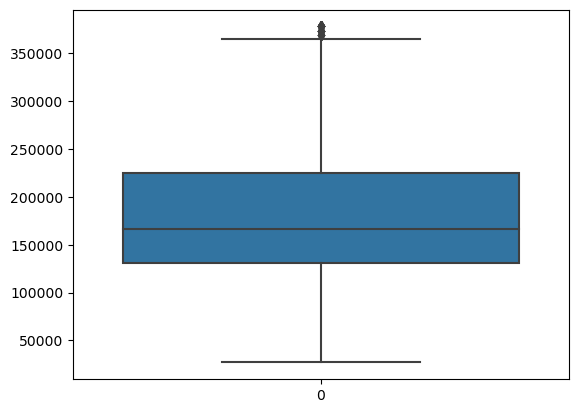

In [63]:
sns.boxplot(cleanedtraindata['Income'])

<Axes: >

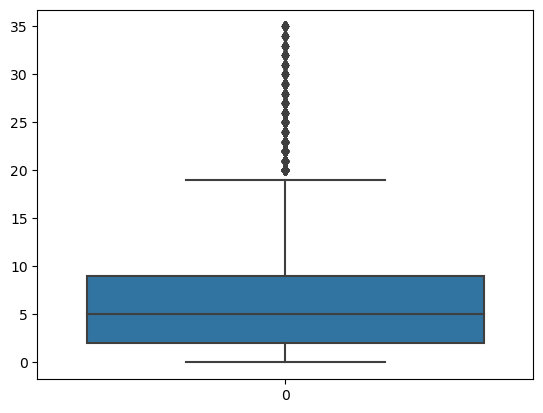

In [64]:
sns.boxplot(cleanedtraindata['Employment length'])

In [65]:
cleanedtraindata.describe()

ID  Children count         Income           Age  \
count  2.266200e+04    22662.000000   22662.000000  22662.000000   
mean   5.079002e+06        0.463904  179247.083201     39.932221   
std    4.183322e+04        0.682834   71014.119162      9.607908   
min    5.008806e+06        0.000000   27000.000000     21.000000   
25%    5.042334e+06        0.000000  130500.000000     32.000000   
50%    5.079098e+06        0.000000  166500.000000     39.000000   
75%    5.115630e+06        1.000000  225000.000000     47.000000   
max    5.150485e+06        2.000000  378000.000000     66.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       22662.000000             22662.0      22662.000000  22662.000000   
mean            6.657930                 1.0          0.273144      0.294458   
std             6.291621                 0.0          0.445584      0.455809   
min             0.000000                 1.0          0.000000      0.000000   
25%             2.000000                 1.0          0.000000      0.000000   
50%             5.000000                 1.0          0.000000      0.000000   
75%             9.000000                 1.0          1.000000      1.000000   
max            35.000000                 1.0          1.000000      1.000000   

       Has an email  Family member count   Account age  Is high risk  
count  22662.000000         22662.000000  22662.000000  22662.000000  
mean       0.098535             2.241285     26.106434      0.016459  
std        0.298043             0.858474     16.438053      0.127236  
min        0.000000             1.000000      0.000000      0.000000  
25%        0.000000             2.000000     12.000000      0.000000  
50%        0.000000             2.000000     24.000000      0.000000  
75%        0.000000             3.000000     39.000000      0.000000  
max        1.000000             4.000000     60.000000      1.000000

In [66]:
from sklearn.preprocessing import LabelEncoder
lst = list(cleanedtraindata.select_dtypes('object').columns)
for i in lst :
  lb = LabelEncoder()
  cleanedtraindata[i] = lb.fit_transform(cleanedtraindata[i])

In [67]:
cleanedtraindata

ID  Gender  Has a car  Has a property  Children count    Income  \
0      5037048       1          1               1               0  135000.0   
1      5044630       0          1               0               1  135000.0   
2      5079079       0          0               1               2  180000.0   
3      5112872       0          1               1               0  360000.0   
4      5105858       0          0               0               0  270000.0   
...        ...     ...        ...             ...             ...       ...   
29156  5009779       1          0               0               0  135000.0   
29158  5065502       0          1               0               1  135000.0   
29159  5091339       0          0               1               0  135000.0   
29161  5029193       0          0               1               1  135000.0   
29162  5047710       0          0               1               0   76500.0   

       Employment status  Education level  Marital status  Dwelling  Age  \
0                      4                4               1         5   44   
1                      0                1               3         1   27   
2                      0                4               1         1   35   
3                      0                1               3         1   57   
4                      4                4               2         1   44   
...                  ...              ...             ...       ...  ...   
29156                  4                4               2         1   38   
29158                  4                1               1         2   34   
29159                  0                4               1         1   30   
29161                  0                4               1         1   42   
29162                  4                4               1         1   48   

       Employment length  Has a mobile phone  Has a work phone  Has a phone  \
0                      8                   1                 0            0   
1                      4                   1                 0            0   
2                     15                   1                 0            0   
3                      5                   1                 0            0   
4                      1                   1                 0            1   
...                  ...                 ...               ...          ...   
29156                  8                   1                 0            0   
29158                  6                   1                 0            0   
29159                  3                   1                 0            1   
29161                 22                   1                 0            0   
29162                  9                   1                 1            1   

       Has an email  Job title  Family member count  Account age  Is high risk  
0                 0          3                  2.0         17.0             0  
1                 0          0                  2.0          1.0             0  
2                 0          8                  4.0         38.0             0  
3                 1         10                  1.0         11.0             0  
4                 0          8                  1.0         41.0             0  
...             ...        ...                  ...          ...           ...  
29156             0          8                  1.0          4.0             0  
29158             0         10                  3.0         13.0             0  
29159             0          2                  2.0          3.0             0  
29161             0          3                  3.0         24.0             0  
29162             0         10                  2.0         29.0             0  

[22662 rows x 20 columns]

In [68]:
skewness = cleanedtraindata.skew().sort_values(ascending=False)
skewness

Is high risk           7.601343
Dwelling               2.968781
Has an email           2.694243
Employment length      1.600188
Marital status         1.241861
Children count         1.155465
Has a work phone       1.018328
Has a phone            0.901959
Income                 0.620247
Gender                 0.583037
Family member count    0.495320
Has a car              0.407862
Account age            0.289892
Age                    0.256852
Job title              0.068813
ID                     0.053733
Has a mobile phone     0.000000
Has a property        -0.600052
Employment status     -0.747755
Education level       -0.793807
dtype: float64

In [69]:
xtrainx=cleanedtraindata.drop(columns=['Is high risk','Has a phone','ID'])
ytrainy=cleanedtraindata['Is high risk']

In [70]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_balance, Y_balance = smote.fit_resample(xtrainx, ytrainy)

In [71]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson')
X_train = power.fit_transform(xtrainx)


In [72]:
xtrainx.columns
columns=['Gender', 'Has a car', 'Has a property', 'Children count', 'Income',
       'Employment status', 'Education level', 'Marital status', 'Dwelling',
       'Age', 'Employment length', 'Has a mobile phone', 'Has a work phone',
       'Has an email', 'Job title', 'Family member count', 'Account age']

In [73]:
X_train=pd.DataFrame(X_train,columns=columns)

In [74]:
X_train

Gender  Has a car  Has a property  Children count    Income  \
0      1.333119   1.224497        0.744026       -0.739417 -0.539827   
1     -0.750121   1.224497       -1.344039        1.248027 -0.539827   
2     -0.750121  -0.816662        0.744026        1.557038  0.155333   
3     -0.750121   1.224497        0.744026       -0.739417  2.070466   
4     -0.750121  -0.816662       -1.344039       -0.739417  1.231778   
...         ...        ...             ...             ...       ...   
22657  1.333119  -0.816662       -1.344039       -0.739417 -0.539827   
22658 -0.750121   1.224497       -1.344039        1.248027 -0.539827   
22659 -0.750121  -0.816662        0.744026       -0.739417 -0.539827   
22660 -0.750121  -0.816662        0.744026        1.248027 -0.539827   
22661 -0.750121  -0.816662        0.744026       -0.739417 -1.763066   

       Employment status  Education level  Marital status  Dwelling       Age  \
0               0.745789         0.701177       -0.210845  2.605393  0.489650   
1              -1.500284        -1.485607        1.651767 -0.250982 -1.437428   
2              -1.500284         0.701177       -0.210845 -0.250982 -0.450718   
3              -1.500284        -1.485607        1.651767 -0.250982  1.638115   
4               0.745789         0.701177        0.895227 -0.250982  0.489650   
...                  ...              ...             ...       ...       ...   
22657           0.745789         0.701177        0.895227 -0.250982 -0.120586   
22658           0.745789        -1.485607       -0.210845  1.457694 -0.565042   
22659          -1.500284         0.701177       -0.210845 -0.250982 -1.046708   
22660          -1.500284         0.701177       -0.210845 -0.250982  0.292948   
22661           0.745789         0.701177       -0.210845 -0.250982  0.865365   

       Employment length  Has a mobile phone  Has a work phone  Has an email  \
0               0.543182                 0.0         -0.613016     -0.330614   
1              -0.168855                 0.0         -0.613016     -0.330614   
2               1.295974                 0.0         -0.613016     -0.330614   
3               0.046106                 0.0         -0.613016      3.024678   
4              -1.173964                 0.0         -0.613016     -0.330614   
...                  ...                 ...               ...           ...   
22657           0.543182                 0.0         -0.613016     -0.330614   
22658           0.231947                 0.0         -0.613016     -0.330614   
22659          -0.424979                 0.0         -0.613016     -0.330614   
22660           1.801157                 0.0         -0.613016     -0.330614   
22661           0.676777                 0.0          1.631277     -0.330614   

       Job title  Family member count  Account age  
0      -1.198102            -0.179350    -0.415601  
1      -2.109935            -0.179350    -1.968406  
2       0.104896             1.806275     0.772241  
3       0.590738            -1.645738    -0.861041  
4       0.104896            -1.645738     0.915433  
...          ...                  ...          ...  
22657   0.104896            -1.645738    -1.538472  
22658   0.590738             0.919247    -0.703478  
22659  -1.483477            -0.179350    -1.664277  
22660  -1.198102             0.919247     0.027213  
22661   0.590738            -0.179350     0.310452  

[22662 rows x 17 columns]

In [75]:
X_test=pd.read_csv('X_test.csv')

In [76]:
X_test

Gender  Has a car  Has a property  Children count    Income  \
0    -0.749886  -0.843373        0.721510       -0.724933  0.461198   
1    -0.749886  -0.843373       -1.385981       -0.724933  0.830983   
2    -0.749886   1.185715       -1.385981       -0.724933  0.729435   
3    -0.749886  -0.843373        0.721510       -0.724933 -1.294728   
4     1.333537   1.185715       -1.385981       -0.724933 -1.976008   
...        ...        ...             ...             ...       ...   
5685 -0.749886   1.185715        0.721510       -0.724933 -0.511723   
5686 -0.749886   1.185715        0.721510       -0.724933 -0.152632   
5687 -0.749886  -0.843373        0.721510       -0.724933 -1.976008   
5688 -0.749886   1.185715       -1.385981       -0.724933 -1.264817   
5689 -0.749886  -0.843373        0.721510        1.282310 -0.511723   

      Employment status  Education level  Marital status  Dwelling       Age  \
0             -0.562250         0.698350        0.913154 -0.245421  0.686523   
1             -0.562250        -1.488366       -2.143966 -0.245421  1.866578   
2              0.748264         0.698350       -0.180173  1.404106 -0.676772   
3              0.748264         0.698350       -0.180173 -0.245421  0.959718   
4              0.748264         0.698350       -0.180173 -0.245421  1.942728   
...                 ...              ...             ...       ...       ...   
5685           0.748264         0.698350       -0.180173 -0.245421  1.789483   
5686           0.748264        -1.488366       -0.180173 -0.245421  0.200499   
5687           0.748264         0.698350        2.235092 -0.245421  1.552242   
5688          -1.501631         0.698350       -0.180173 -0.245421  1.135067   
5689          -1.501631         0.698350       -2.143966 -0.245421 -1.175161   

      Employment length  Has a mobile phone  Has a work phone  Has an email  \
0             -0.148297                 0.0         -0.618393     -0.328101   
1              1.224355                 0.0         -0.618393      3.047840   
2             -1.146197                 0.0         -0.618393     -0.328101   
3             -1.146197                 0.0         -0.618393     -0.328101   
4              0.065541                 0.0         -0.618393     -0.328101   
...                 ...                 ...               ...           ...   
5685          -0.402896                 0.0         -0.618393     -0.328101   
5686           0.693712                 0.0         -0.618393      3.047840   
5687           1.131982                 0.0          1.617094     -0.328101   
5688           1.547506                 0.0          1.617094     -0.328101   
5689           0.250523                 0.0         -0.618393      3.047840   

      Job title  Family member count  Account age  
0      0.804481            -1.671512    -1.333091  
1     -1.184926            -0.182729     1.384703  
2      0.097858            -0.182729     1.210975  
3      0.097858            -0.182729    -0.373299  
4      0.097858            -0.182729    -1.050951  
...         ...                  ...          ...  
5685   0.097858            -0.182729    -0.118788  
5686  -0.913210            -0.182729     0.938499  
5687   0.097858            -1.671512     0.059770  
5688   0.097858            -0.182729     1.254961  
5689   0.097858             0.930541     0.649126  

[5690 rows x 17 columns]

In [77]:
y_test=pd.read_csv('y_test.csv')

In [78]:
y_test

Is high risk
0                0
1                0
2                0
3                0
4                0
...            ...
5685             0
5686             0
5687             0
5688             0
5689             0

[5690 rows x 1 columns]

In [79]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, ytrainy)

prediction = log_model.predict(X_test)

In [80]:
print('Logistic Model  Train Accuracy : ',log_model.score(X_train, ytrainy)*100, '%')
print('Logistic Model Test Accuracy : ', log_model.score(X_test, y_test)*100, '%')

Logistic Model  Train Accuracy :  98.35407289736122 %
Logistic Model Test Accuracy :  98.43585237258348 %
